In [2]:
from __future__ import division
import argparse
import math
import sys

import numpy as np
from scipy.optimize import fsolve
from scipy.special import comb
from scipy.stats import poisson
import scipy.optimize
import scipy.misc
from scipy import linalg as LA
import matplotlib.pyplot as plt


def obtain_val_r_1(v1, v2, t1, mean_degree):
    val = 0

    for d_r in range(0, max_degree):
        prob_r = poisson.pmf(d_r, mean_degree)
        val += d_r*prob_r*1.0/mean_degree * ((1 - t1 + t1*u_r_11*v1 + t1*u_r_12*v2)**(d_r-1))

    return val

def obtain_val_r_2(v1, v2, t2, mean_degree):
    val = 0

    for d_r in range(0, max_degree):
        prob_r = poisson.pmf(d_r, mean_degree)
        val += d_r*prob_r*1.0/mean_degree * ((1 - t2 + t2*u_r_22*v2 + t2*u_r_21*v1)**(d_r-1))

    return val

def equations(p):
    v1, v2 = p
    val_r_1 = obtain_val_r_1(v1, v2, t_r_1, mean_degree)
    val_r_2 = obtain_val_r_2(v1, v2, t_r_2, mean_degree)

    return (v1 - val_r_1, v2 - val_r_2)


def cascade_prob():
    h_r_1, h_r_2 = fsolve(equations, (0.01, 0.01), xtol=1e-6)

    H_1 = 0
    for d_r in range(0, max_degree):
        prob_r = poisson.pmf(d_r, mean_degree)
        H_1 += prob_r*((1 - t_r_1 + t_r_1*u_r_11*h_r_1 + t_r_1*u_r_12*h_r_2)**d_r)

    H_2 = 0
    for d_r in range(0, max_degree):
        prob_r = poisson.pmf(d_r, mean_degree)
        H_2 += prob_r*((1 - t_r_2 + t_r_2*u_r_22*h_r_2 + t_r_2*u_r_21*h_r_1)**d_r)

    return (1 - H_1, 1 - H_2)

def parse_args(args):
    parser = argparse.ArgumentParser(description = 'Parameters')
    parser.add_argument('-m', type = float, nargs = '+', default = np.arange(1.0, 10.1, 0.1), help='np.linspace(0.001, 48, 200) (default); list of mean degree: you can type 1 3 5')
    parser.add_argument('-t1', type = float, default = 0.2, help='0.5 (default); the transmissibility of strain-1')
    parser.add_argument('-t2', type = float, default = 0.5, help='0.5 (default); the transmissibility of strain-2')
    parser.add_argument('-m1', type = float, default = 0.75, help='0.5 (default); the mutation probability from 1 to 1')
    parser.add_argument('-m2', type = float, default = 0.75, help='0.5 (default); the mutation probability from 2 to 2')
    return parser.parse_args(args)

# paras = parse_args(sys.argv[1:])
mean_degree_list = np.linspace(0, 10, 50)
# t1 = paras.t1
# t2 = paras.t2
# m1 = paras.m1
# m2 = paras.m2
t1 = 0.10800
t2 = 0.20400
m1 = 0.66667
m2 = 0.47059

pe_0_list = []
pe_1_list = []
pe_list = []

for mean_degree in mean_degree_list:
    max_degree = 20
    t_r_1 = t1
    t_r_2 = t2
    u_r_11 = m1
    u_r_12 = 1 - u_r_11
    u_r_22 = m2
    u_r_21 = 1 - u_r_22

    
    # Here
    transMAT = [[t1,0],[0,t2]]
    mutMat = [[m1,1-m1],[1-m2,m2]]
    a, b = LA.eig(np.dot(transMAT,mutMat))

    s1, s2 = cascade_prob()
    pe_0_list.append(s1)
    pe_1_list.append(s2)
    pe_list.append(s1 + s2)
    
#     print mean_degree, s1, s2, np.real(max(a))


/home/ytian/.conda/envs/ytian/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/home/ytian/.conda/envs/ytian/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
/home/ytian/.conda/envs/ytian/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Text(0.5, 1.0, 'Theoratical Prob of Emergence for Mutation Model')

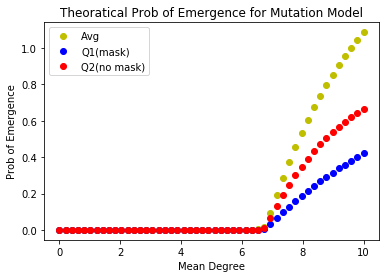

In [3]:


plt.figure()
plt.plot(mean_degree_list, pe_list, 'yo')
plt.plot(mean_degree_list, pe_0_list, 'bo')
plt.plot(mean_degree_list, pe_1_list, 'ro')

plt.xlabel("Mean Degree")
plt.ylabel("Prob of Emergence")
title = "Theoratical Prob of Emergence for Mutation Model"
plt.legend(["Avg", "Q1(mask)", "Q2(no mask)"])
plt.title(title)